# Temperature increases for locations closer to the equator and decreases closer to the poles, as expected.
# There are more locations of lower humidity farther from the equator than nearer (no registered value of lower than 40% near the equator), and a greater concentration of locations with higher humidity near the equator.
# Cloudiness values are well distributed near the equator, but less so away - there are several more locations of low cloudiness outside of the -20 to 20 latitude range.

In [1]:
#set dependencies
import json
import requests as req
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from citipy import citipy
from requests_toolbelt.threaded import pool

In [2]:
g = {"lat":[],"lon":[]}
h = {}

In [3]:
coor = pd.DataFrame(g)
ci = pd.DataFrame(h)
ci["City"] = ""
ci

,City


In [7]:
#generate coordinates from across the planet
for i in range(1,750):                 #Choose number of Lat Long to be generated

    u = float(rd.uniform(-90,90))

    v = float(rd.uniform(-180,180))
  
    coor.set_value(i, "lat", u)
    coor.set_value(i, "lon", v)
coor

,lat,lon
1,83.120101,-174.111256
2,-27.169442,-35.576721
3,-64.227517,153.879956
4,-24.006434,94.559577
5,-7.763015,150.117063
6,-48.397176,-146.531380
7,78.658983,142.699161
8,-70.439580,-112.827654
9,-18.429835,-38.185506
10,30.385327,18.776417


In [8]:
#use citipy to find nearest city to each set of coordinates
for index, row in coor.iterrows():
    city = citipy.nearest_city(row["lat"],row["lon"])
    ci.set_value(index, "City", city.city_name)
    
ci

,City
1,mys shmidta
2,arraial do cabo
3,hobart
4,carnarvon
5,kandrian
6,mataura
7,chokurdakh
8,punta arenas
9,caravelas
10,ajdabiya


In [25]:
#main dataframe with each category header we want
meas = pd.DataFrame({})
meas["City"] = ""
meas["Country"] = ""
meas["Date (Unix)"] = ""
meas["Latitude"] = ""
meas["Longitude"] = ""
meas["Wind Speed (MPH)"] = ""
meas["Temperature (F)"] = ""
meas["Humidity (%)"] = ""
meas["Cloudiness (%)"] = ""
meas

,City,Latitude,Longitude,Wind Speed (MPH),Temperature (F),Humidity (%),Cloudiness (%)


In [66]:
#use openweather api and cities we collected to collect weather information. join the json file results together
urls = []
api_key = "25bc90a1196e6f153eece0bc0b0fc9eb"
url = "http://api.openweathermap.org/data/2.5/weather?"
for index, row in ci.iterrows():
    query_url = url + "appid=" + api_key + "&q=" + row["City"] + "&units=imperial"
    urls.append(query_url)

p = pool.Pool.from_urls(urls)
p.join_all()


    

In [ ]:
# use the json files with weather information and input relevant data into dataframe
k = 0
for response in p.responses():
    u = response.request_kwargs["url"]
    print("Now processing city number " + str(k) + " of " + str(len(urls)))
    print(u)
    c = u[u.find("&q=")+3:u.find("&units=imperial")]
    rr = response.json()
    meas.set_value(k, "City", c)
    
    try:
        date = rr["dt"]
        meas.set_value(k, "Date (Unix)", date)
        country = rr['sys']["country"]
        meas.set_value(k, "Country", country)
        lat = rr["coord"]["lat"]
        lon = rr["coord"]["lon"]
        meas.set_value(k, "Latitude", lat)
        meas.set_value(k, "Longitude", lon)
        temp = rr["main"]["temp"]
        humid = rr["main"]["humidity"]
        cloud = rr["clouds"]["all"]
        wind = rr["wind"]["speed"]
        meas.set_value(k, "Wind Speed (MPH)", wind)
        meas.set_value(k, "Temperature (F)", temp)
        meas.set_value(k, "Humidity (%)", humid)
        meas.set_value(k, "Cloudiness (%)", cloud)
    except:
        meas.set_value(k, "Wind Speed (MPH)", "not found")
        meas.set_value(k, "Temperature (F)", "not found")
        meas.set_value(k, "Humidity (%)", "not found")
        meas.set_value(k, "Cloudiness (%)", "not found")
    k = k + 1

In [68]:
meas

,City,Latitude,Longitude,Wind Speed (MPH),Temperature (F),Humidity (%),Cloudiness (%),Date (Unix),Country
0,arraial do cabo,-22.97,-42.03,3.36,82.35,62,75,1.508699e+09,BR
1,hobart,-42.88,147.33,9.17,57.2,67,75,1.508702e+09,AU
2,carnarvon,-24.87,113.63,15.23,66.36,100,20,1.508703e+09,AU
3,kandrian,-6.22,149.55,2.71,78.33,92,36,1.508703e+09,PG
4,punta arenas,-53.15,-70.92,25.28,59,44,75,1.508699e+09,CL
5,mys shmidta,47.75,38.03,8.63,35.4,97,0,1.508703e+09,UA
6,mataura,27.5,77.68,2.37,69.87,46,0,1.508703e+09,IN
7,chokurdakh,70.63,147.92,10.87,-2.58,74,64,1.508703e+09,RU
8,ajdabiya,30.76,20.23,9.42,66.81,63,0,1.508703e+09,LY
9,ushuaia,-54.8,-68.3,26.4,59,41,40,1.508699e+09,AR


In [69]:
meas.to_csv("measurements 2017-10-22.csv")

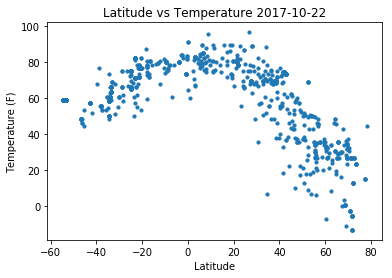

In [70]:
#generate scatter plots - city latitude vs temperature, humidity, wind speed, and cloudiness, respectively
plt.scatter(meas["Latitude"], meas["Temperature (F)"], s = 10)
plt.title("Latitude vs Temperature 2017-10-22")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.savefig("temp.png")
plt.show()

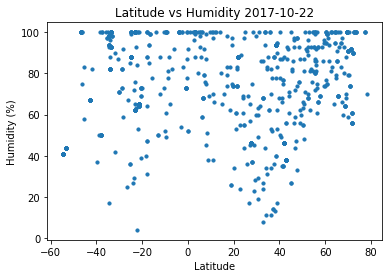

In [71]:
plt.scatter(meas["Latitude"], meas["Humidity (%)"], s = 10)
plt.title("Latitude vs Humidity 2017-10-22")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.savefig("humid.png")
plt.show()

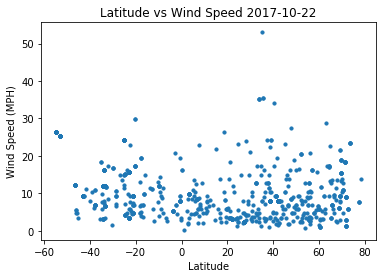

In [72]:
plt.scatter(meas["Latitude"], meas["Wind Speed (MPH)"], s = 10)
plt.title("Latitude vs Wind Speed 2017-10-22")
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.savefig("wind.png")
plt.show()

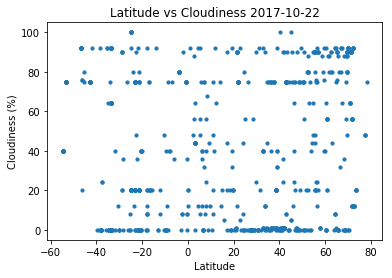

In [73]:
plt.scatter(meas["Latitude"], meas["Cloudiness (%)"], s = 10)
plt.title("Latitude vs Cloudiness 2017-10-22")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.savefig("cloud.png")
plt.show()